In [82]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

In [54]:
df = pd.read_csv('./data/features-total-2f8f6676.csv', index_col='revision_id')
tag_df = pd.read_csv('./data/tag.csv', index_col='id')
df.fillna(0, inplace=True)
df.head()

,isContributorAnonymous,isBot,timeOfDay,localizedTimeOfDay,dayOfWeek,localizedDayOfWeek,isMinorEdit,authorRank,authorRankOfLast200Edits,authorRankOneMonth,...,rawCommentLength,userCommentLength,hasNumericOutlierInColumns,hasNumericOutlierInRows,tableDataTypeInformationGain,templateUseFlags,templateUseFifaFlags,templateUsePageLink,templateUseYesNo,tag_id
revision_id,,,,,,,,,,,,,,,,,,,,,
228189784,0.0,0.0,13.0,-1.0,7.0,-1.0,0.0,0.000000,0.000000,0.0,...,34.0,34.0,0.0,0.0,-1.000000,0.0,0.0,0.0,0.0,12
730449352,0.0,0.0,2.0,-1.0,2.0,-1.0,0.0,0.833333,0.857143,0.5,...,14.0,0.0,1.0,0.0,0.134129,0.0,0.0,0.0,0.0,12
216224416,0.0,0.0,17.0,-1.0,6.0,-1.0,1.0,0.000000,0.000000,0.0,...,67.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,12
539338621,0.0,1.0,1.0,-1.0,4.0,-1.0,1.0,0.000000,0.000000,0.0,...,152.0,0.0,0.0,0.0,-1.000000,0.0,0.0,0.0,0.0,12
746191686,1.0,0.0,20.0,23.0,2.0,2.0,0.0,-1.000000,-1.000000,-1.0,...,10.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,12


/Users/falco/.local/share/virtualenvs/vandalism-classifier-YnBQ-UjL/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/falco/.local/share/virtualenvs/vandalism-classifier-YnBQ-UjL/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/falco/.local/share/virtualenvs/vandalism-classifier-YnBQ-UjL/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/falco/.local/share/virtualenvs/vandalism-classifier-YnBQ-UjL/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarni

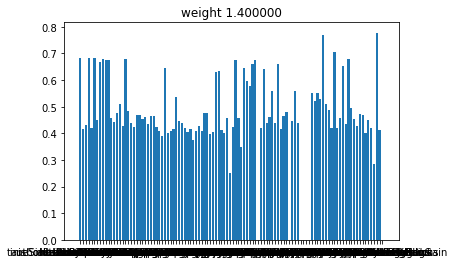

,feature_name,precision,recall,f1
0,isContributorAnonymous,0.682927,0.766653,0.722372
1,isBot,0.416603,0.666530,0.512732
2,timeOfDay,0.429728,0.477319,0.452275
3,localizedTimeOfDay,0.681702,0.759706,0.718593
4,dayOfWeek,0.419425,0.554148,0.477465
5,localizedDayOfWeek,0.682945,0.765836,0.722019
6,isMinorEdit,0.451085,0.968533,0.615504
7,authorRank,0.666551,0.784226,0.720616
8,authorRankOfLast200Edits,0.679769,0.770331,0.722222
9,authorRankOneMonth,0.675598,0.772783,0.720930


In [97]:
from IPython.display import display

def single_feature(feature_name):
    X = df[[feature_name]]
    y = df['tag_id'].apply(lambda tag_id: tag_id != 12)
    clf = DecisionTreeClassifier(**{
        'class_weight': {
            1: 1.4
        }
    })
    y_pred = cross_val_predict(clf, X, y)
    return pd.Series({
        'precision': precision_score(y, y_pred),
        'recall': recall_score(y, y_pred),
        'f1': f1_score(y, y_pred)
    })
    

feature_names = pd.Series(df.columns[df.columns != 'tag_id'])
features = pd.DataFrame({'feature_name': feature_names})

values = feature_names.apply(single_feature)
metrics = pd.concat([features, values], axis=1)
with pd.option_context('display.max_rows', None, 'display.max_columns', 5):
    plt.bar(feature_names, metrics.precision)
    plt.title("weight %f" % weight)
    plt.show()
    display(metrics)